In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
# read California housing prices
df = pd.read_csv('data/housing.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### EDA

In [4]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


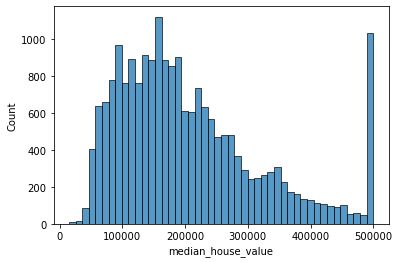

In [5]:
sns.histplot(df['median_house_value']);

In [6]:
selected_columns = [
    'longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'
]

In [7]:
df = df[selected_columns]
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
dtype: object

### Q1: Find a feature with missing values. How many missing values does it have?

In [8]:
df.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

### Q2: What's the median (50% percentile) for variable 'population'?

In [9]:
df.population.median()

1166.0

In [10]:
# shuffle
np.random.seed(42)
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.shuffle(idx)

n, n_train, n_val, n_test, n_train + n_val + n_test

(20640, 12384, 4128, 4128, 20640)

In [11]:
# split the data
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

df_train.shape, df_val.shape, df_test.shape

((12384, 9), (4128, 9), (4128, 9))

In [12]:
# reset index in df's
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

In [13]:
df_train.head(2)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0
1,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0


In [14]:
# log transformation
y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)

In [15]:
# delete target variable
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [16]:
df_test.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-120.26,37.13,33.0,1239.0,250.0,648.0,227.0,2.0278
1,-117.91,33.86,26.0,2296.0,570.0,1415.0,527.0,2.4732
2,-118.36,34.04,48.0,1769.0,429.0,993.0,405.0,2.3214
3,-118.15,34.69,32.0,1300.0,234.0,712.0,249.0,3.2500
4,-119.97,38.93,24.0,856.0,185.0,388.0,108.0,3.1806


### Q3: Which option (without regularization) gives better RMSE?

In [17]:
# NAs option 1: imputation with 0
# functions
def prepare_X(df):
    df['total_bedrooms'] = df['total_bedrooms'].fillna(0)
    X = df.values
    return X

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred): 
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

# appling functions
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred).round(2)

0.33

In [18]:
# NAs option 2: imputation with mean
# functions
def prepare_X(df):
    df['total_bedrooms'] = df['total_bedrooms'].fillna(df['total_bedrooms'].mean())
    X = df.values
    return X

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred): 
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

# appling functions
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)
rmse(y_val, y_pred).round(2)

0.33

### Q4: Which option (with regularization) gives better RMSE?

In [19]:
# NAs imputation with 0
# functions
def prepare_X(df):
    df['total_bedrooms'] = df['total_bedrooms'].fillna(0)
    X = df.values
    return X

def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred): 
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [20]:
# appling functions
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r=r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred).round(2)
    print(r, w0, score)

0 -11.686975242003061 0.33
1e-06 -11.686959176148244 0.33
0.0001 -11.685368865331979 0.33
0.001 -11.67093131828245 0.33
0.01 -11.528493585912102 0.33
0.1 -10.27450028213464 0.33
1 -4.920480897725033 0.33
5 -1.482095745623377 0.34
10 -0.7899311832263198 0.34


### Q5: What's the standard deviation of all the scores?

In [21]:
tot_score = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    # shuffle
    np.random.seed(seed)
    n = len(df)

    n_val = int(n * 0.2)
    n_test = int(n * 0.2)
    n_train = n - n_val - n_test
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    # split the data
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]
    
    # reset index in df's
    df_train.reset_index(drop=True, inplace=True)
    df_val.reset_index(drop=True, inplace=True)
    df_test.reset_index(drop=True, inplace=True)
    
    # log transformation
    y_train = np.log1p(df_train.median_house_value)
    y_val = np.log1p(df_val.median_house_value)
    y_test = np.log1p(df_test.median_house_value)
    
    # delete target variable
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']

    # appling functions
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    tot_score.append(score)
    print(seed, score)

0 0.33884304805313364
1 0.3362387255956078
2 0.332091231884185
3 0.34051536090368256
4 0.33890240665736765
5 0.34348667257203247
6 0.3451980953099613
7 0.3395989927411592
8 0.34662308731917285
9 0.3365926124179404


In [22]:
np.std(tot_score).round(3)

0.004

### Q6: What's the RMSE on the test dataset?

In [23]:
# shuffle
np.random.seed(9)
n = len(df)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test
idx = np.arange(n)
np.random.shuffle(idx)
    
# split the data
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]
    
# reset index in df's
df_train.reset_index(drop=True, inplace=True)
df_val.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)
    
# log transformation
y_train = np.log1p(df_train.median_house_value)
y_val = np.log1p(df_val.median_house_value)
y_test = np.log1p(df_test.median_house_value)
    
# delete target variable
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# combine train and validation datasets
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
y_full_train = np.concatenate([y_train, y_val])

# appling functions
X_df_full_train = prepare_X(df_full_train)
w0, w = train_linear_regression_reg(X_df_full_train, y_full_train, r=0.001)
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred).round(2)
print(score)

0.35
